In [2]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [18]:
N = 200
T0 = 2
DiracComb = np.zeros(N)
DiracComb[::T0] = 1
DiracComb_f = fft(DiracComb)

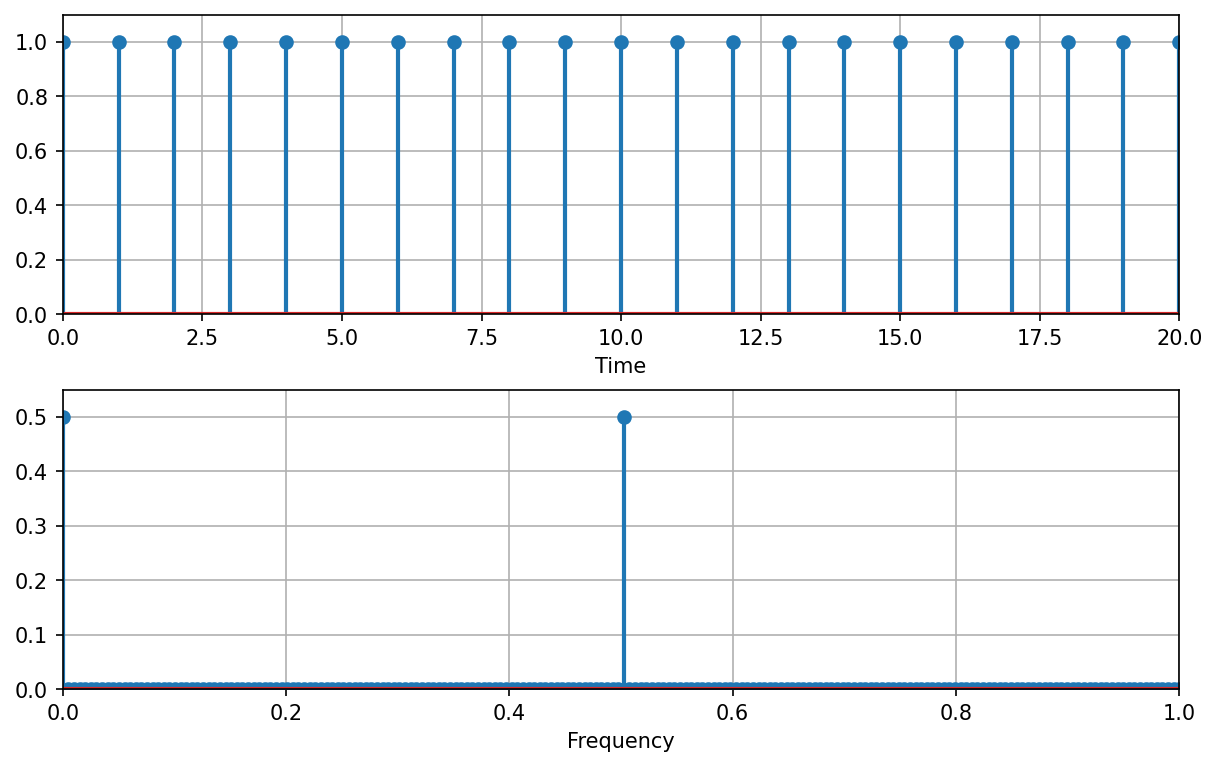

In [20]:
fig,axs = plt.subplots(2,1,figsize=(8, 5),dpi=150,constrained_layout = True)
axs[0].stem(DiracComb[DiracComb > 0])
axs[0].set_ylim([0, 1.1])
axs[0].set_xlim([0, 20])
axs[0].set_xlabel("Time")

f = np.linspace(0, 1, N)
axs[1].stem(f, abs(DiracComb_f)/N)  # Actually there is a factor N in the fft
axs[1].set_ylim([0, 1.1 * 1 / T0])
axs[1].set_xlabel("Frequency")
plt.show()

In [21]:
def tri(t, p = 1):   # tri(t/p)
    if t < -p:
        return 0
    if t < 0:
        return 1 + t/p
    if t <= p:
        return 1 - t/p
    else:
        return 0
    
def rect(t,p):  # rect(t/p)
    if np.isscalar(t):
        if t < -p/2:
            return 0
        if t <= p/2:
            return 1
        else:
            return 0
    else:
        y = np.zeros_like(t)
        y[np.where((-1/2 <= tt/p)*(tt/p <= 1/2))] = 1.0
        return y    

In [32]:
tlim = 1
tt = np.linspace(-tlim, tlim, 2**13)
flim = 2*np.pi
ff = np.linspace(-flim, flim, 2**12)

In [33]:
rect_numerical = rect(tt,1)

In [34]:
z = np.convolve(DiracComb_f, rect_numerical)

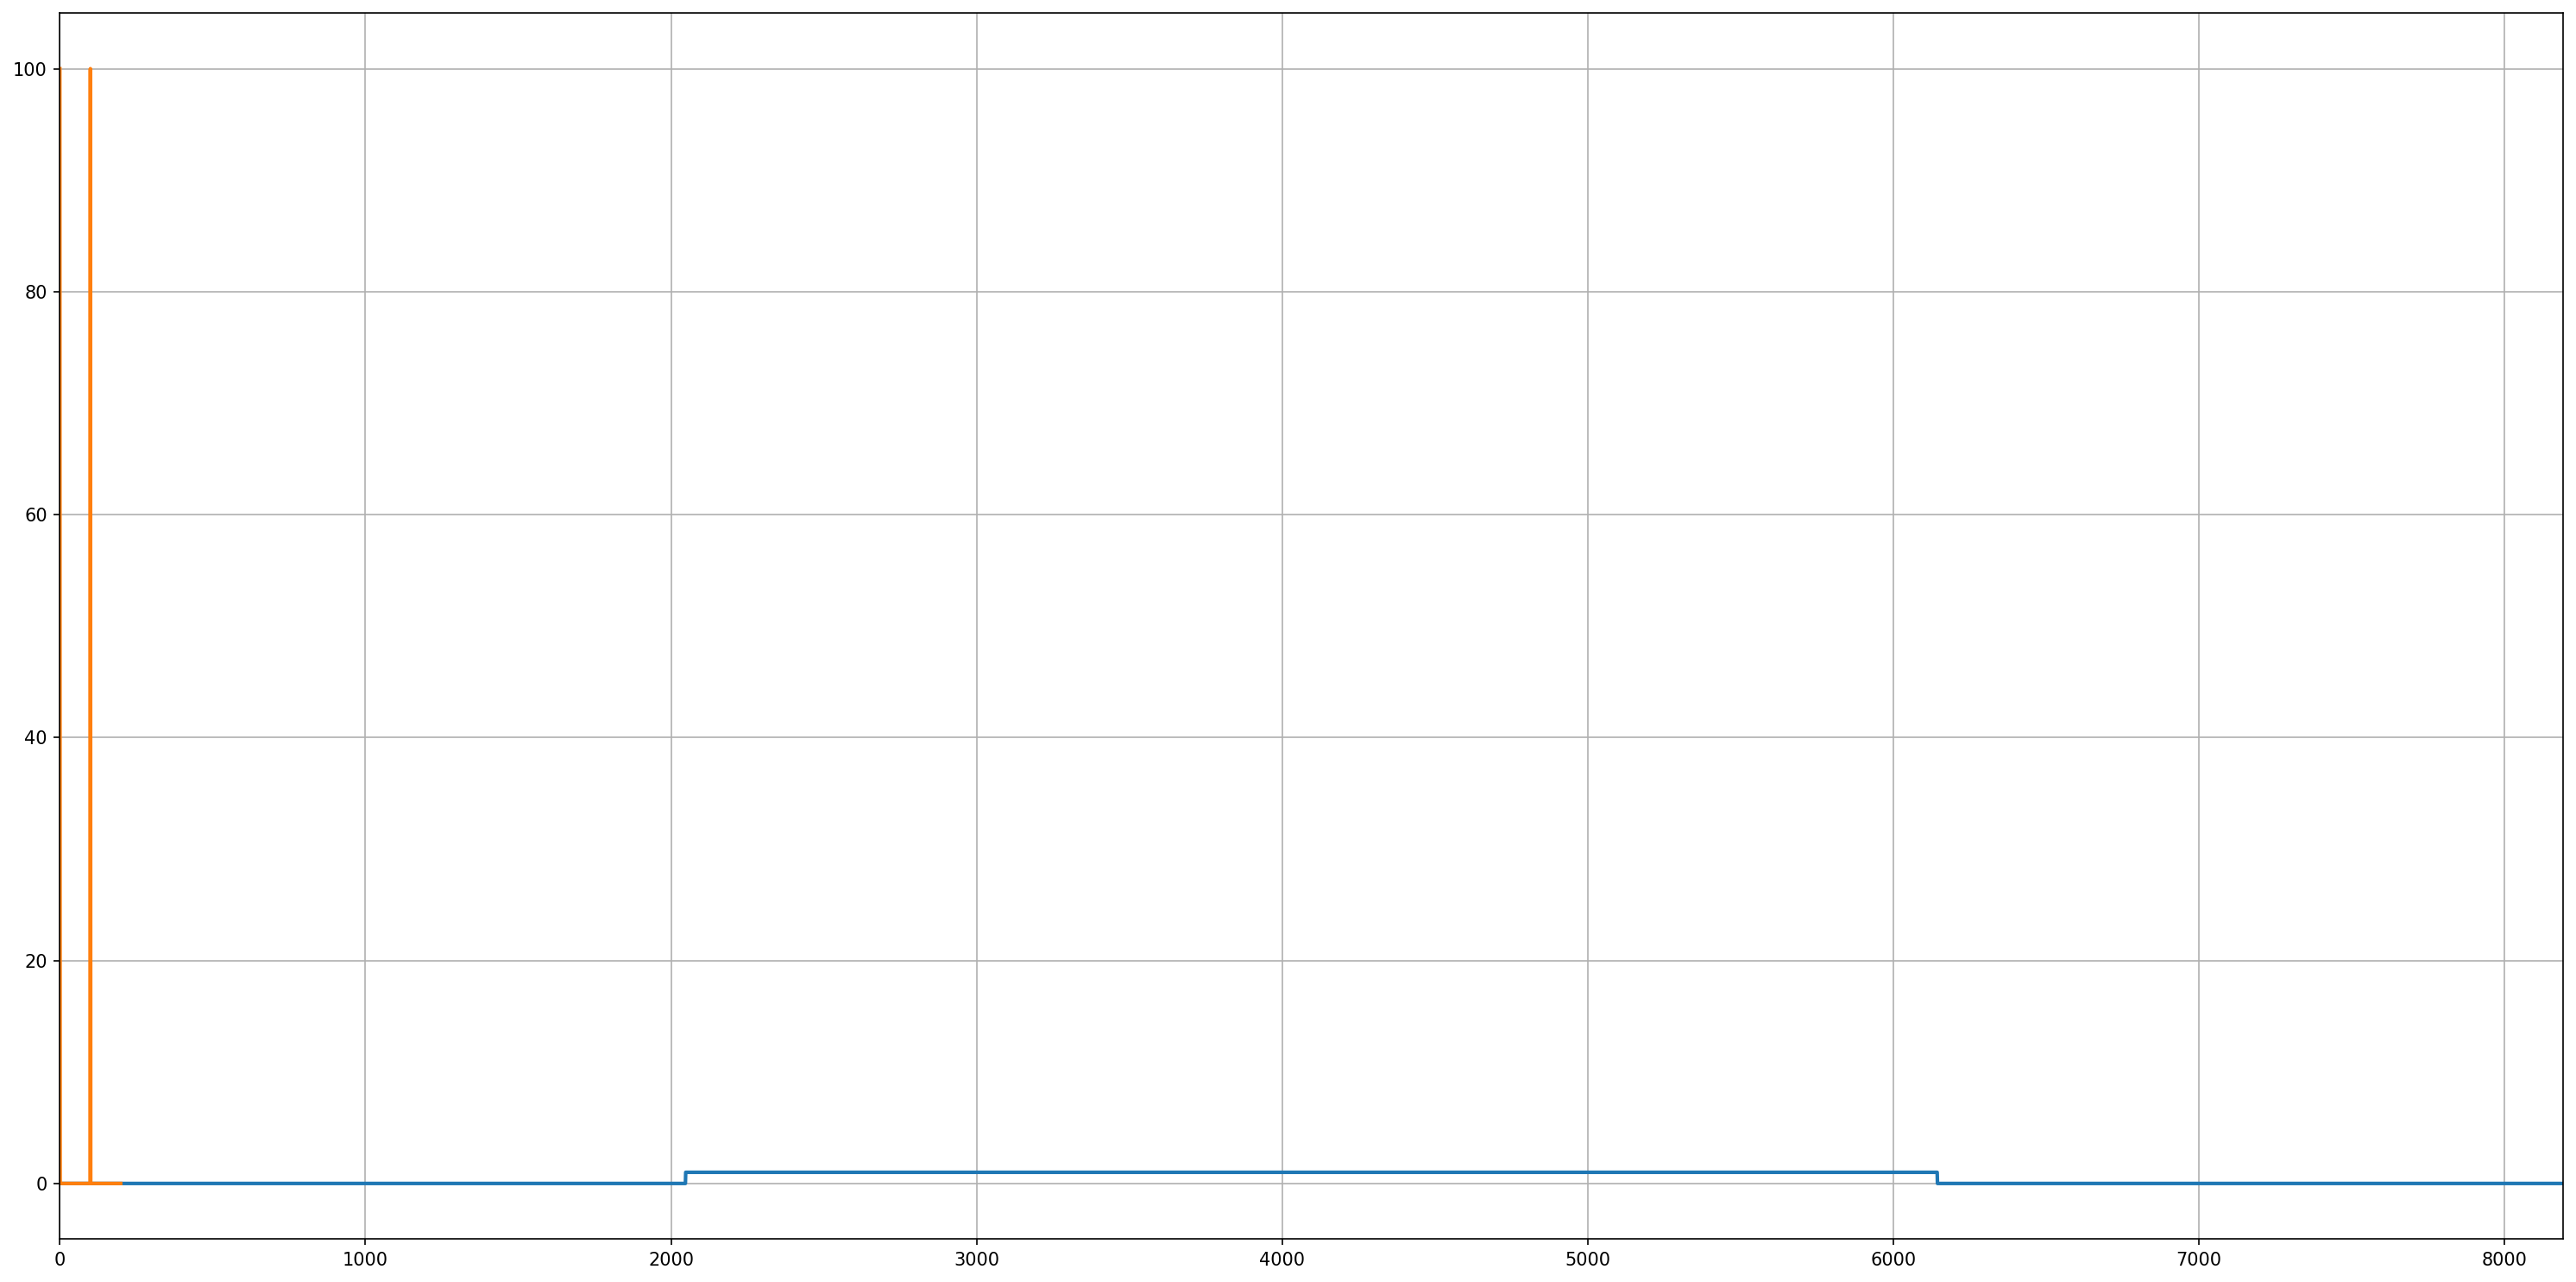

In [37]:
plt.plot(rect_numerical)
plt.plot(DiracComb_f)

Text(0.5, 0, 'Time')

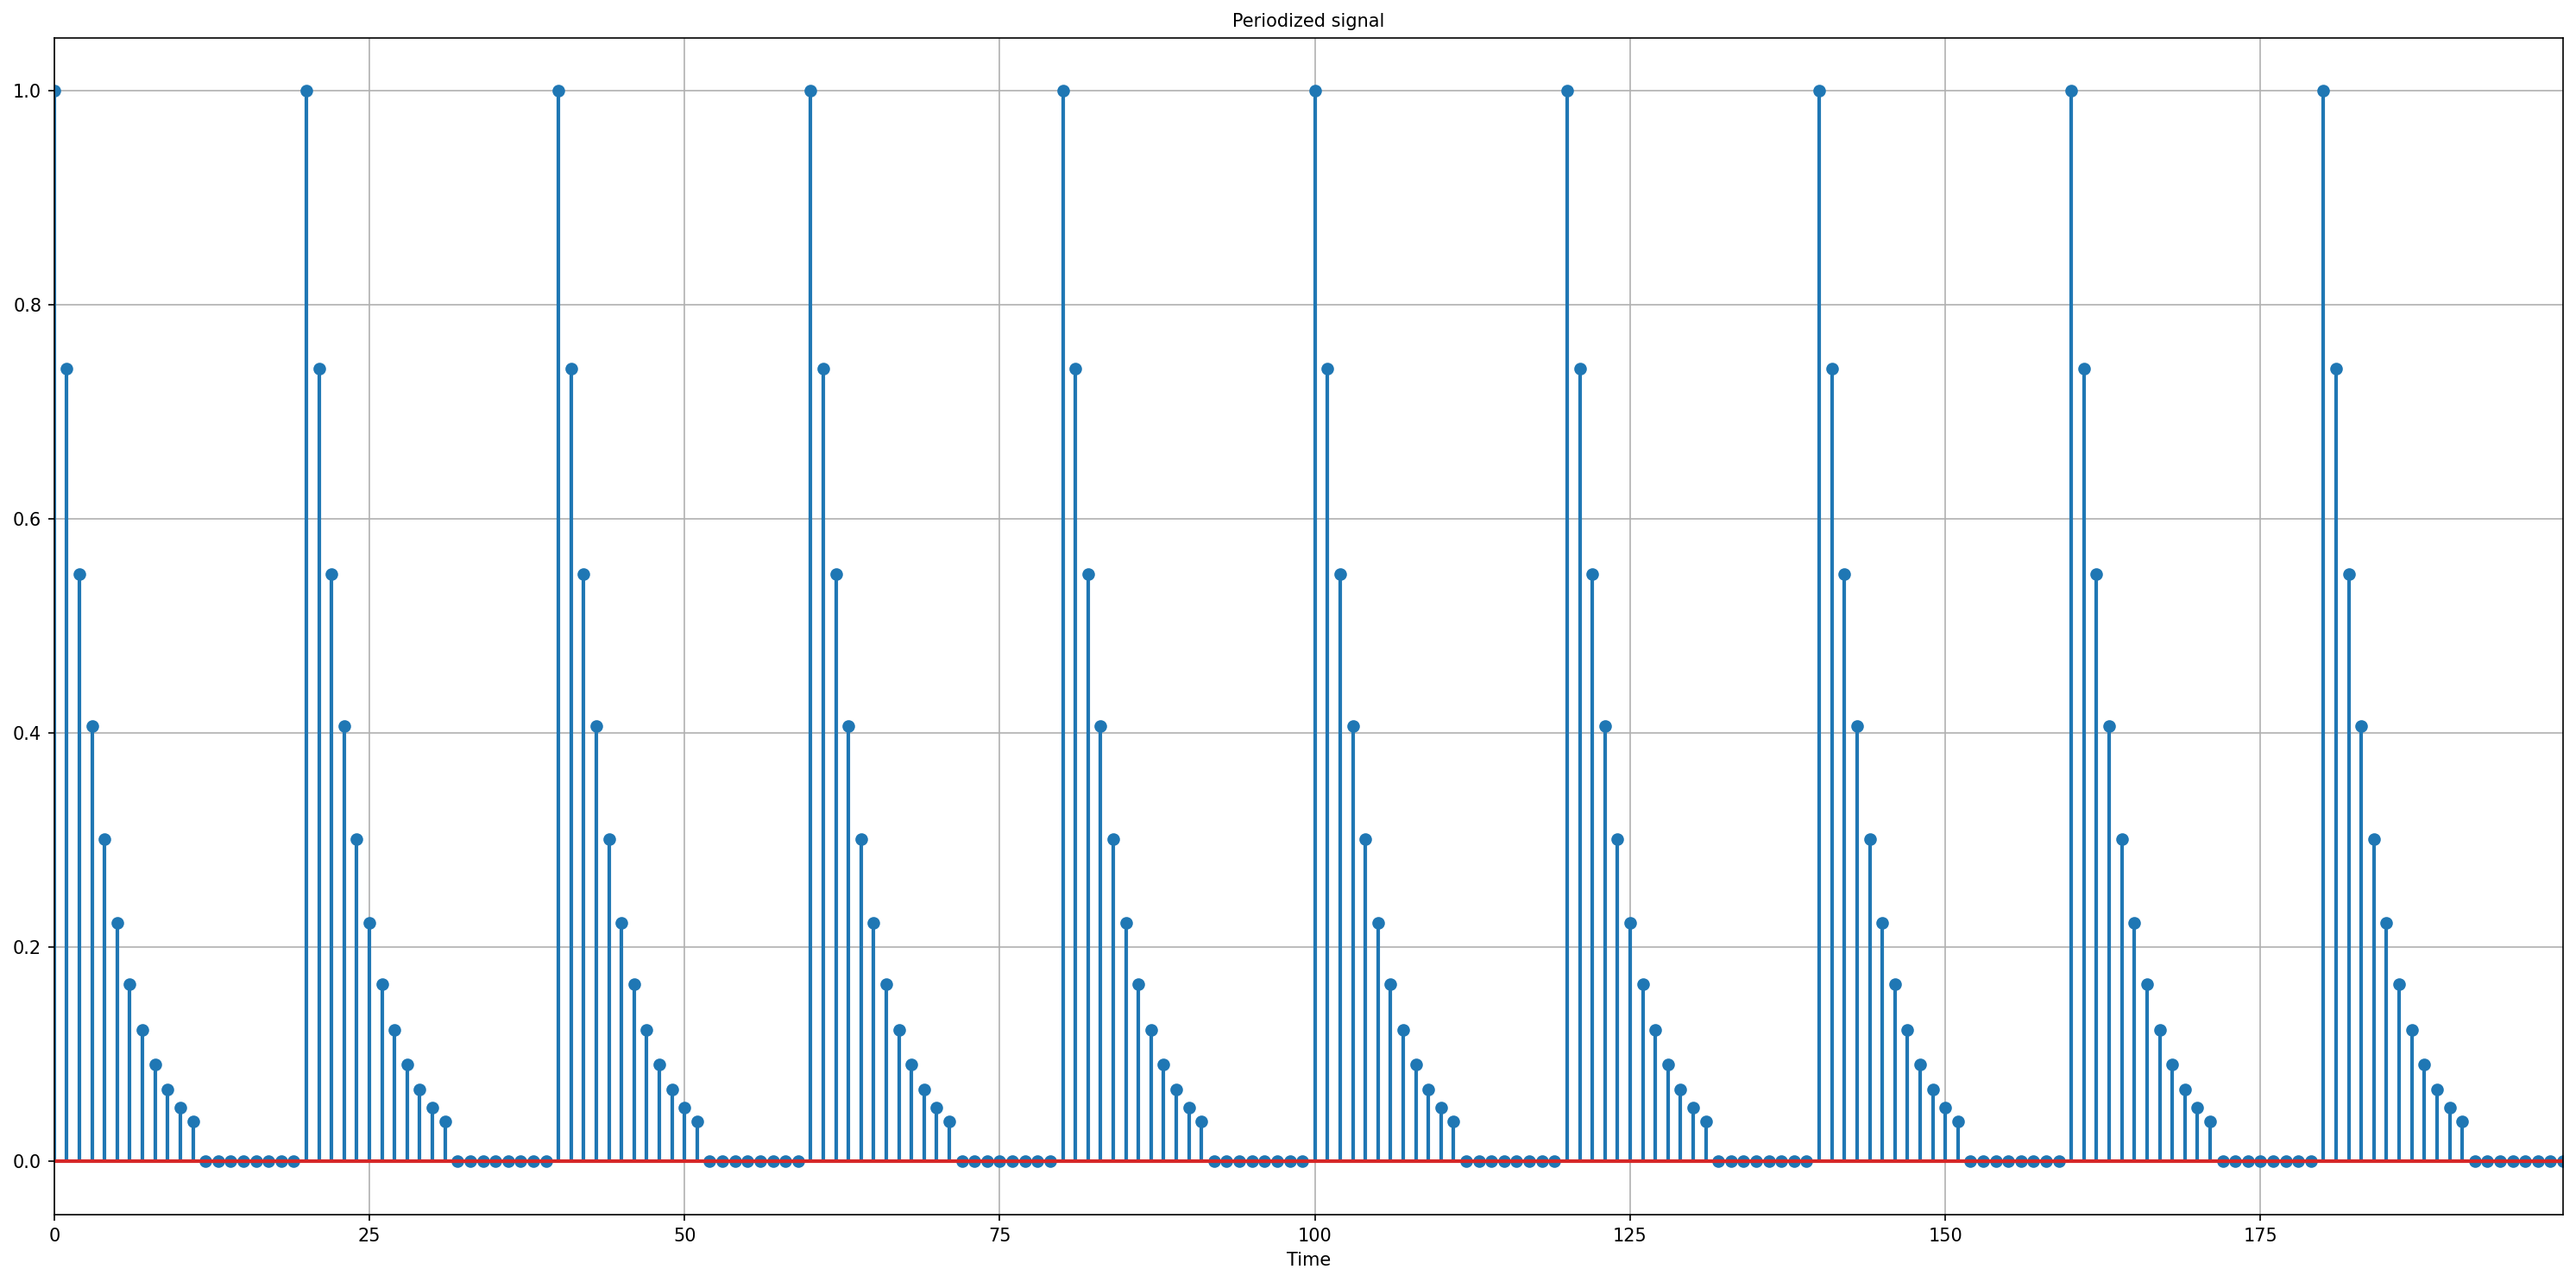

In [44]:
%matplotlib inline
N = 200
L0 = 20
L = 12  # L is the length of the pulse
DiracComb = np.zeros(N)
DiracComb[::L0] = 1
pulse = np.zeros(40)
pulse[0:L] = np.exp(-0.3*np.arange(L))
z = np.convolve(DiracComb, pulse)
plt.stem(z[0:200])
plt.title('Periodized signal')
plt.xlabel('Time')


In [41]:
pulse

array([   1.000,    1.000,    1.000,    1.000,    1.000,    1.000,
          1.000,    1.000,    1.000,    1.000,    1.000,    1.000,
          0.000,    0.000,    0.000,    0.000,    0.000,    0.000,
          0.000,    0.000,    0.000,    0.000,    0.000,    0.000,
          0.000,    0.000,    0.000,    0.000,    0.000,    0.000,
          0.000,    0.000,    0.000,    0.000,    0.000,    0.000,
          0.000,    0.000,    0.000,    0.000])